In [20]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm 

In [32]:
df=pd.read_csv("datasets_423609_1456925_TATASTEEL.csv",index_col='Date',parse_dates=True)
print("shape of data is :",df.shape)
df=df.dropna()

shape of data is : (5141, 14)


In [33]:
print(df.head())

               Symbol Series  Prev Close   Open    High    Low    Last  \
Date                                                                     
2011-06-01  TATASTEEL     EQ      589.00  592.0  597.45  580.1  582.25   
2011-06-02  TATASTEEL     EQ      582.30  577.0  577.00  571.5  574.75   
2011-06-03  TATASTEEL     EQ      574.90  577.3  583.30  571.0  572.50   
2011-06-06  TATASTEEL     EQ      573.25  573.0  573.00  564.3  568.20   
2011-06-07  TATASTEEL     EQ      567.90  567.0  580.00  566.0  579.55   

             Close    VWAP   Volume  Turnover   Trades  Deliverable Volume  \
Date                                                                         
2011-06-01  582.30  585.53  4662509  2.73e+14  95551.0            1.98e+06   
2011-06-02  574.90  574.48  2134221  1.23e+14  50465.0            6.63e+05   
2011-06-03  573.25  576.51  2429921  1.40e+14  51294.0            7.57e+05   
2011-06-06  567.90  567.81  2756340  1.57e+14  59233.0            1.08e+06   
2011-06-07  5

In [34]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,2291.00,2291.00,2291.00,2291.00,2291.00,2291.00,2291.00,2.29e+03,2.29e+03,2291.00,2.29e+03,2291.00
mean,428.74,429.31,435.49,422.44,428.59,428.66,429.09,6.96e+06,2.93e+14,85658.53,1.73e+06,0.27
std,118.33,118.57,119.32,117.35,118.27,118.29,118.37,4.86e+06,2.13e+14,43482.52,1.15e+06,0.10
min,198.25,197.50,206.00,195.30,197.20,198.25,199.60,1.62e+05,5.83e+12,2796.00,2.42e+04,0.05
25%,344.48,345.73,350.95,340.10,344.40,344.48,345.76,3.96e+06,1.56e+14,56384.50,9.73e+05,0.19
50%,413.80,413.50,419.30,407.95,413.90,413.70,413.57,5.55e+06,2.27e+14,76396.00,1.47e+06,0.26
75%,501.85,500.85,507.98,493.38,501.48,501.73,501.17,8.39e+06,3.60e+14,103045.00,2.14e+06,0.34
max,783.50,782.75,793.00,771.25,783.70,783.50,785.78,4.94e+07,2.40e+15,428867.00,1.65e+07,0.68


Axes(0.125,0.2;0.775x0.68)


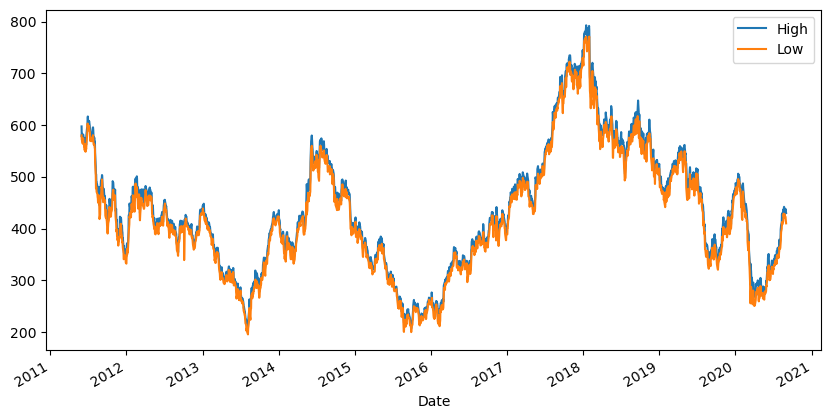

In [67]:
print(df[['High', 'Low']].plot(figsize=(10, 5)))


## Checking for stationarity

In [44]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')  # Use 'AIC' for automatic lag selection
    print("1. ADF:", dftest[0])
    print("2. P-VALUE:", dftest[1])
    print("3. number of lags:", dftest[2])
    print("4. Number of observations used for ADF Regression and CVC:", dftest[3])
    print("5. Critical Values:")
    for key, val in dftest[4].items():
        print("\t", key, ":", val)


In [49]:
ad_test(df["High"])

1. ADF: -2.1084520440475956
2. P-VALUE: 0.24112960220095903
3. number of lags: 1
4. Number of observations used for ADF Regression and CVC: 2289
5. Critical Values:
	 1% : -3.433210047397854
	 5% : -2.862803502559176
	 10% : -2.5674426199971334


In [50]:
ad_test(df["Low"])

1. ADF: -2.2113728574040974
2. P-VALUE: 0.20214368996368814
3. number of lags: 2
4. Number of observations used for ADF Regression and CVC: 2288
5. Critical Values:
	 1% : -3.433211298825206
	 5% : -2.862804055145576
	 10% : -2.5674429142088244


## Figuring out order of AR I MA   model

In [48]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [52]:
stepwise_fit=auto_arima(df['High'],trace=True,supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16279.762, Time=2.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16309.244, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16275.254, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16275.476, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16307.413, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=16277.127, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16277.160, Time=0.71 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=16278.788, Time=1.88 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=16273.392, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=16275.266, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=16275.299, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=16273.618, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=16276.932, Time=0.97 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 8.892 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2291
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -8134.696
Date:                Wed, 18 Oct 2023   AIC                          16273.392
Time:                        22:37:43   BIC                          16284.864
Sample:                             0   HQIC                         16277.576
                               - 2291                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1251      0.017      7.458      0.000       0.092       0.158
sigma2        71.2826      1.441     49.455      0.000      68.458      74.108
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               524.32
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
from statsmodels.tsa.arima_model import ARIMA

## Spliting data into training and testing sets

In [54]:
print(df.shape)

(2291, 14)


In [56]:
train=df.iloc[:-200]
test=df.iloc[-200:]
print(train.shape,test.shape)

(2091, 14) (200, 14)


In [65]:
model = ARIMA(train['High'], order=(1,0,5))

# Fit the model
model= model.fit()

# Summary of the model
print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 2091
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -7396.298
Date:                Thu, 19 Oct 2023   AIC                          14808.595
Time:                        07:02:44   BIC                          14853.759
Sample:                             0   HQIC                         14825.141
                               - 2091                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        440.9812     55.969      7.879      0.000     331.285     550.678
ar.L1          0.9968      0.002    619.499      0.000       0.994       1.000
ma.L1          0.1431      0.020      7.309      0.0

# MAKING PREDICTIONS ON TEST SET

In [71]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start,end=end,type='levels')
pred.index=df.index[start:end+1]
print(pred)



Date
2019-11-14    409.85
2019-11-15    410.01
2019-11-18    410.01
2019-11-19    410.14
2019-11-20    410.19
               ...  
2020-08-25    424.13
2020-08-26    424.18
2020-08-27    424.23
2020-08-28    424.29
2020-08-31    424.34
Name: predicted_mean, Length: 200, dtype: float64


<Axes: xlabel='Date'>

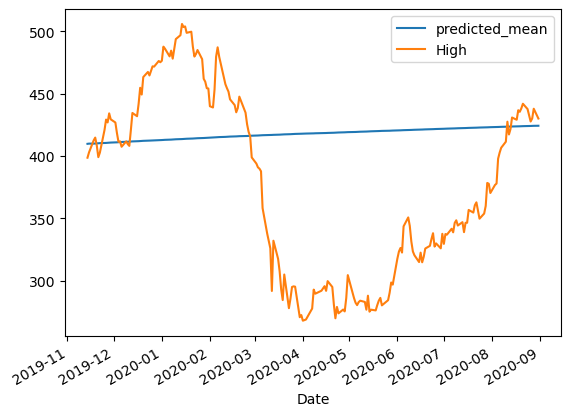

In [72]:
pred.plot(legend=True)
test['High'].plot(legend=True)

In [73]:
test['High'].mean()

378.10825

In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['High']))
print(rmse)

83.94310215765744


In [76]:
model2=ARIMA(df['High'],order=(1,0,5))
model2=model2.fit()
df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-08-25,TATASTEEL,EQ,429.50,432.00,432.65,421.45,423.95,424.00,425.67,10554484,4.49e+14,119137.0,2.24e+06,0.21
2020-08-26,TATASTEEL,EQ,424.00,425.00,427.75,422.20,425.50,425.00,424.84,7957164,3.38e+14,68604.0,1.79e+06,0.22
2020-08-27,TATASTEEL,EQ,425.00,425.50,430.20,423.00,427.50,426.85,425.97,9549716,4.07e+14,93181.0,2.09e+06,0.22
2020-08-28,TATASTEEL,EQ,426.85,429.65,438.00,423.05,423.90,424.20,430.42,15212017,6.55e+14,139003.0,3.61e+06,0.24
2020-08-31,TATASTEEL,EQ,424.20,426.50,430.15,410.00,411.00,413.00,419.91,15746139,6.61e+14,123587.0,4.26e+06,0.27


In [83]:
index_future_dates=pd.date_range(start='2020-08-31',end='2020-09-30')
pred=model2.predict(start=len(df),end=len(df)+30,type='levels').rename("ARIMA MODEL PREDICTIONS")
pred.index=index_future_dates



Text(0, 0.5, 'Predicted High values')

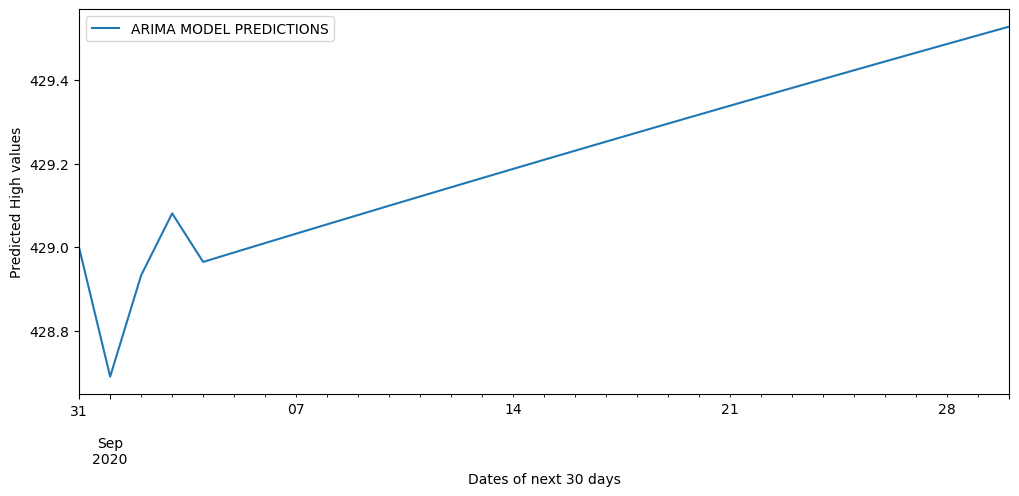

In [84]:
pred.plot(figsize=(12,5),legend=True)
plt.xlabel('Dates of next 30 days')
plt.ylabel('Predicted High values')